In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [20]:
Z = np.random.randint(0, 2, (300, 600))
M = np.zeros(Z.shape)

In [21]:
def update(args):
    global Z, M, im

    N = np.zeros(Z.shape, dtype=int)
    N[1:-1, 1:-1] += (
        Z[:-2, :-2]
        + Z[:-2, 1:-1]
        + Z[:-2, 2:]
        + Z[1:-1, :-2]
        + Z[1:-1, 2:]
        + Z[2:, :-2]
        + Z[2:, 1:-1]
        + Z[2:, 2:]
    )

    birth = (N == 3)[1:-1, 1:-1] & (Z[1:-1, 1:-1] == 0)
    survive = ((N == 2) | (N == 3))[1:-1, 1:-1] & (Z[1:-1, 1:-1] == 1)
    Z[...] = 0
    Z[1:-1, 1:-1][birth | survive] = 1

    M[M > 0.25] = 0.25
    M *= 0.995
    M[Z == 1] = 1

    im.set_data(M)

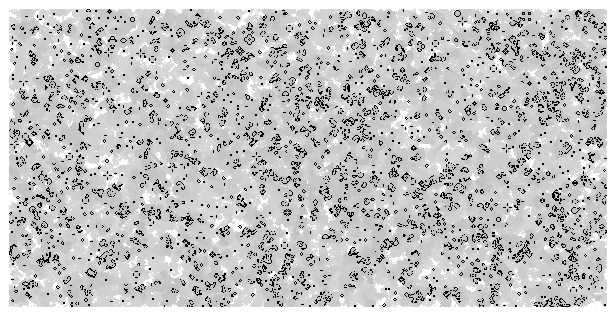

In [22]:
size = np.array(Z.shape)

dpi = 80.0
figsize = size[1] / float(dpi), size[0] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(M, interpolation="nearest", cmap=plt.cm.gray_r, vmin=0, vmax=1)
plt.xticks([]), plt.yticks([])

Writer = animation.writers["ffmpeg"]
writer = Writer(fps=15, metadata=dict(artist="me"), bitrate=1800)

anim = animation.FuncAnimation(fig, update, interval=10, frames=100)
anim.save("./outputs/game_of_life.mp4", writer=writer)

plt.show()